In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import the dataset
team_Data = pd.read_csv("Resources/teamData.csv")
player_Data = pd.read_csv("Resources/playerData.csv")
cross_ref = pd.read_csv("Resources/crossReference.csv")

In [3]:
cross_ref.head()

,Team,TM
0,76ers,PHI
1,Blackhawks,TRI
2,Bobcats,CHA
3,Bommers,STB
4,Braves,BLB


In [4]:
# load the data
del team_Data["TM"]
team_Data

,Year,Team,Record,Winning Percentage
0,1964,76ers,34-46,0.425
1,1965,76ers,40-40,0.500
2,1966,76ers,55-25,0.688
3,1967,76ers,68-13,0.840
4,1968,76ers,62-20,0.756
...,...,...,...,...
1412,2014,Wizards,44-38,0.537
1413,2015,Wizards,46-36,0.561
1414,2016,Wizards,41-41,0.500
1415,2017,Wizards,23-20,0.535


In [5]:
combined_team_data = pd.merge(team_Data, cross_ref, on="Team")
combined_team_data

,Year,Team,Record,Winning Percentage,TM
0,1964,76ers,34-46,0.425,PHI
1,1965,76ers,40-40,0.500,PHI
2,1966,76ers,55-25,0.688,PHI
3,1967,76ers,68-13,0.840,PHI
4,1968,76ers,62-20,0.756,PHI
...,...,...,...,...,...
2278,2013,Wizards,29-53,0.354,WAS
2279,2014,Wizards,44-38,0.537,WAS
2280,2015,Wizards,46-36,0.561,WAS
2281,2016,Wizards,41-41,0.500,WAS


In [6]:
combined_team_data = combined_team_data.loc[(combined_team_data["Year"] >= 1986) & (combined_team_data["Year"]< 2018)]
combined_team_data

,Year,Team,Record,Winning Percentage,TM
22,1986,76ers,54-28,0.659,PHI
23,1987,76ers,45-37,0.549,PHI
24,1988,76ers,36-46,0.439,PHI
25,1989,76ers,46-36,0.561,PHI
26,1990,76ers,53-29,0.646,PHI
...,...,...,...,...,...
2278,2013,Wizards,29-53,0.354,WAS
2279,2014,Wizards,44-38,0.537,WAS
2280,2015,Wizards,46-36,0.561,WAS
2281,2016,Wizards,41-41,0.500,WAS


In [7]:
player_Data.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,10,1950.0,Charlie Black,F-C,28.0,AND,29.0,NaN,NaN,NaN,...,0.688,NaN,NaN,NaN,88.0,NaN,NaN,NaN,133.0,279.0
1,19,1950.0,Frankie Brian,G,26.0,AND,64.0,NaN,NaN,NaN,...,0.824,NaN,NaN,NaN,189.0,NaN,NaN,NaN,192.0,1138.0
2,31,1950.0,Jake Carter,F-C,25.0,AND,11.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,8.0,NaN,NaN,NaN,32.0,38.0
3,37,1950.0,Bill Closs,SF,28.0,AND,64.0,NaN,NaN,NaN,...,0.718,NaN,NaN,NaN,160.0,NaN,NaN,NaN,190.0,752.0
4,73,1950.0,Frank Gates,G,29.0,AND,64.0,NaN,NaN,NaN,...,0.622,NaN,NaN,NaN,91.0,NaN,NaN,NaN,147.0,287.0


In [8]:
# Merging Crossreference_data and player_data - NOTE: We need to check the types of the years first

player_Data["Year"].dtypes

dtype('float64')

In [9]:
# Taking player Dataframe from 1986 till 2017
player_Data = player_Data.loc[(player_Data["Year"] >= 1986.0) & (player_Data["Year"]< 2018.0)]
player_Data["Year"] = player_Data["Year"].astype(int)
player_Data

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
263,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,0.728,12.0,50.0,62.0,74.0,23.0,3.0,47.0,80.0,277.0
264,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,0.667,16.0,36.0,52.0,14.0,7.0,15.0,14.0,51.0,116.0
265,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,0.667,13.0,26.0,39.0,8.0,2.0,6.0,18.0,37.0,122.0
266,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,0.864,2.0,17.0,19.0,112.0,13.0,0.0,38.0,32.0,144.0
267,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,0.857,44.0,80.0,124.0,26.0,14.0,8.0,40.0,118.0,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24592,13341,1997,Rod Strickland,PG,30.0,WSB,82.0,81.0,2997.0,19.7,...,0.738,95.0,240.0,335.0,727.0,143.0,14.0,270.0,166.0,1410.0
24593,13365,1997,Ben Wallace,PF,22.0,WSB,34.0,0.0,197.0,6.0,...,0.300,25.0,33.0,58.0,2.0,8.0,11.0,18.0,27.0,38.0
24594,13374,1997,Chris Webber,PF,23.0,WSB,72.0,72.0,2806.0,21.8,...,0.565,238.0,505.0,743.0,331.0,122.0,137.0,230.0,258.0,1445.0
24595,13382,1997,Chris Whitney,PG,25.0,WSB,82.0,1.0,1117.0,15.2,...,0.832,13.0,91.0,104.0,182.0,49.0,4.0,68.0,100.0,430.0


In [10]:
complete_nba_data = pd.merge(player_Data, combined_team_data, left_on=["Tm","Year"], right_on=["TM","Year"])
complete_nba_data

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,Team,Record,Winning Percentage,TM
0,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,74.0,23.0,3.0,47.0,80.0,277.0,Hawks,50-32,0.610,ATL
1,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,14.0,7.0,15.0,14.0,51.0,116.0,Hawks,50-32,0.610,ATL
2,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,8.0,2.0,6.0,18.0,37.0,122.0,Hawks,50-32,0.610,ATL
3,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,112.0,13.0,0.0,38.0,32.0,144.0,Hawks,50-32,0.610,ATL
4,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,26.0,14.0,8.0,40.0,118.0,193.0,Hawks,50-32,0.610,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15257,13341,1997,Rod Strickland,PG,30.0,WSB,82.0,81.0,2997.0,19.7,...,727.0,143.0,14.0,270.0,166.0,1410.0,Bullets,44-38,0.537,WSB
15258,13365,1997,Ben Wallace,PF,22.0,WSB,34.0,0.0,197.0,6.0,...,2.0,8.0,11.0,18.0,27.0,38.0,Bullets,44-38,0.537,WSB
15259,13374,1997,Chris Webber,PF,23.0,WSB,72.0,72.0,2806.0,21.8,...,331.0,122.0,137.0,230.0,258.0,1445.0,Bullets,44-38,0.537,WSB
15260,13382,1997,Chris Whitney,PG,25.0,WSB,82.0,1.0,1117.0,15.2,...,182.0,49.0,4.0,68.0,100.0,430.0,Bullets,44-38,0.537,WSB


In [11]:
four_factor_data = complete_nba_data[["Year","Player","TM","eFG%","TOV%","ORB%","FT%","Winning Percentage"]]
four_factor_data

,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage
0,1986,John Battle,ATL,0.455,15.0,2.1,0.728,0.610
1,1986,Antoine Carr,ATL,0.527,11.8,6.9,0.667,0.610
2,1986,Lorenzo Charles,ATL,0.557,14.8,5.3,0.667,0.610
3,1986,Johnny Davis,ATL,0.435,22.2,0.6,0.864,0.610
4,1986,Scott Hastings,ATL,0.418,17.4,7.5,0.857,0.610
...,...,...,...,...,...,...,...,...
15257,1997,Rod Strickland,WSB,0.472,16.9,3.8,0.738,0.537
15258,1997,Ben Wallace,WSB,0.348,24.7,15.1,0.300,0.537
15259,1997,Chris Webber,WSB,0.543,15.0,10.1,0.565,0.537
15260,1997,Chris Whitney,WSB,0.509,15.2,1.4,0.832,0.537


In [12]:
age_player_data =  complete_nba_data[["Year","Player","Age","G","MP","PER"]]
age_player_data

,Year,Player,Age,G,MP,PER
0,1986,John Battle,23.0,64.0,639.0,11.7
1,1986,Antoine Carr,24.0,17.0,258.0,14.4
2,1986,Lorenzo Charles,22.0,36.0,273.0,11.5
3,1986,Johnny Davis,30.0,27.0,402.0,13.9
4,1986,Scott Hastings,25.0,62.0,650.0,7.5
...,...,...,...,...,...,...
15257,1997,Rod Strickland,30.0,82.0,2997.0,19.7
15258,1997,Ben Wallace,22.0,34.0,197.0,6.0
15259,1997,Chris Webber,23.0,72.0,2806.0,21.8
15260,1997,Chris Whitney,25.0,82.0,1117.0,15.2


In [22]:
mp_quartiles = age_player_data["MP"].quantile([.25,.5,.75])
lowerq_mp = mp_quartiles[.25]
median_mp = mp_quartiles[.5]
upperq_mp = mp_quartiles[.75]
iqr_mp = upperq_mp -lowerq_mp
lower_bound_mp = lowerq_mp - (1.5*iqr_mp)
upper_bound_mp = upperq_mp + (1.5*iqr_mp)


print(f"Lower Quartile: {lowerq_mp}\n"
      f"Median: {median_mp}\n"
      f"Upper Quartile: {upperq_mp}\n"
      f"IQR: {iqr_mp}\n"
      f"Upper Bound: {upper_bound_mp} & Lower Bound: {lower_bound_mp}\n")

Lower Quartile: 292.25
Median: 972.0
Upper Quartile: 1891.75
IQR: 1599.5
Upper Bound: 4291.0 & Lower Bound: -2107.0



In [24]:
game_quartiles = age_player_data["G"].quantile([.25,.5,.75])
lowerq_game = game_quartiles[.25]
median_game = game_quartiles[.5]
upperq_game = game_quartiles[.75]
iqr_game = upperq_game -lowerq_game
lower_bound_game = lowerq_game - (1.5*iqr_game)
upper_bound_game = upperq_game + (1.5*iqr_game)


print(f"Lower Quartile: {lowerq_game}\n"
      f"Median: {median_game}\n"
      f"Upper Quartile: {upperq_game}\n"
      f"IQR: {iqr_game}\n"
      f"Upper Bound: {upper_bound_game} & Lower Bound: {lower_bound_game}\n")

Lower Quartile: 24.0
Median: 53.0
Upper Quartile: 75.0
IQR: 51.0
Upper Bound: 151.5 & Lower Bound: -52.5



In [46]:
player_names = []
mean_player_games = (age_player_data.groupby("Player")["G"].mean() >= 24)
mean_player_games

Player
A.C. Green             True
A.J. Bramlett         False
A.J. English           True
A.J. Guyton            True
A.J. Hammons          False
                      ...  
Zeljko Rebraca         True
Zendon Hamilton       False
Zoran Dragic          False
Zoran Planinic         True
Zydrunas Ilgauskas     True
Name: G, Length: 2501, dtype: bool

In [47]:
(mean_player_games.index.values) >= "True"

array([False, False, False, ...,  True,  True,  True])

In [48]:
if (mean_player_games.index.values) >= "True":
    player_names = mean_player_games.index

print(player_names)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

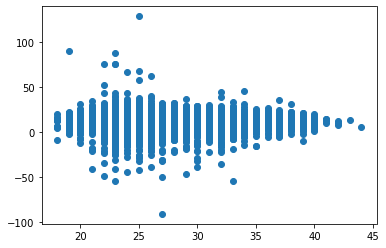

In [15]:
plt.scatter(age_player_data["Age"],age_player_data["PER"])
plt.ylim()
plt.show()

In [16]:
age_player_data.groupby("Player")["MP"].mean()

Player
A.C. Green            2150.117647
A.J. Bramlett           61.000000
A.J. English          1554.000000
A.J. Guyton            415.333333
A.J. Hammons           163.000000
                         ...     
Zeljko Rebraca         546.666667
Zendon Hamilton        222.857143
Zoran Dragic            37.500000
Zoran Planinic         528.000000
Zydrunas Ilgauskas    1766.538462
Name: MP, Length: 2501, dtype: float64

In [17]:
age_player_data.groupby("Player")["MP"].median()

Player
A.C. Green            2240.0
A.J. Bramlett           61.0
A.J. English          1554.0
A.J. Guyton            607.0
A.J. Hammons           163.0
                       ...  
Zeljko Rebraca         450.0
Zendon Hamilton         46.0
Zoran Dragic            37.5
Zoran Planinic         515.0
Zydrunas Ilgauskas    2130.0
Name: MP, Length: 2501, dtype: float64